In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt 
plt.rc("font", size=14)

import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

In [2]:
#data = pd.read_csv("./data/clean_data.csv")
data = pd.read_csv("./data/after_first_process_data.csv")
data = data.dropna()
data.rename(columns={'y': 'subscribed'}, inplace=True)

data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41188 entries, 0 to 41187
Data columns (total 22 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  campaign        41188 non-null  int64  
 11  pdays           41188 non-null  int64  
 12  previous        41188 non-null  int64  
 13  poutcome        41188 non-null  object 
 14  emp.var.rate    41188 non-null  float64
 15  cons.price.idx  41188 non-null  float64
 16  cons.conf.idx   41188 non-null  float64
 17  euribor3m       41188 non-null 

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,subscribed,year,date
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,2008,2008-05-01
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,2008,2008-05-01
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,2008,2008-05-01
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,2008,2008-05-01
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,2008,2008-05-01


In [3]:
def separate_variables(df):
    numeric_vars = df.select_dtypes(include=['float64', 'int64'])
    categorical_vars = df.select_dtypes(include=['object'])
    return numeric_vars, categorical_vars

numeric_df, categorical_df = separate_variables(data)

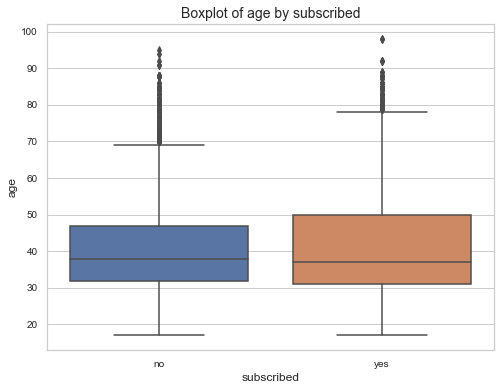

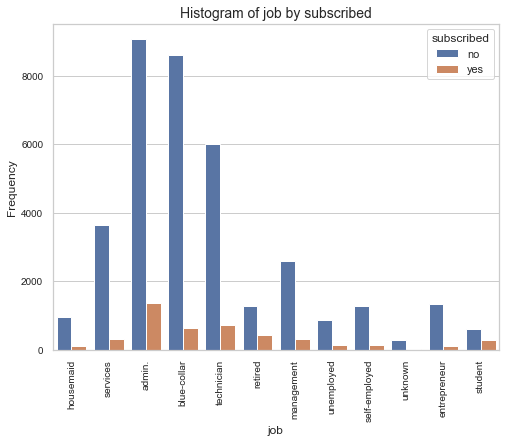

In [4]:
def plot_boxplot(data, column, y):
    plt.figure(figsize=(8, 6))  
    sns.boxplot(x=y, y=column, data=data) 
    plt.title(f'Boxplot of {column} by {y}', fontsize=14)  
    plt.xlabel(y, fontsize=12)  
    plt.ylabel(column, fontsize=12)  
    plt.xticks(fontsize=10)  
    plt.yticks(fontsize=10) 
    plt.show()

def plot_histogram(data, column, y):
    plt.figure(figsize=(8, 6)) 
    sns.countplot(x=column,hue=y, data=data) 
    plt.title(f'Histogram of {column} by {y}', fontsize=14)  
    plt.xlabel(column, fontsize=12) 
    plt.ylabel('Frequency', fontsize=12)  
    plt.xticks(rotation='vertical',fontsize=10)  
    plt.yticks(fontsize=10)  
    plt.show()

def plot_data(data, y):
    for column in data.columns:
        if data[column].dtype == 'object':
            plot_histogram(data, column, y)
        else:
            plot_boxplot(data, column, y)

plot_boxplot(data,'age','subscribed')
plot_histogram(data,'job','subscribed')

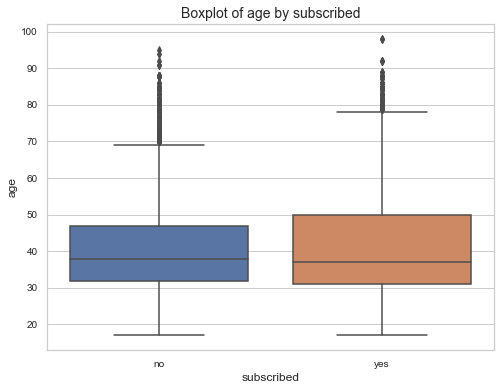

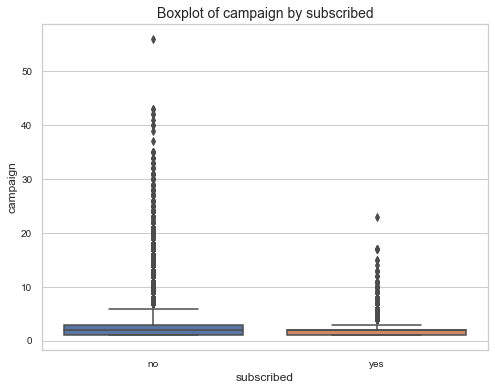

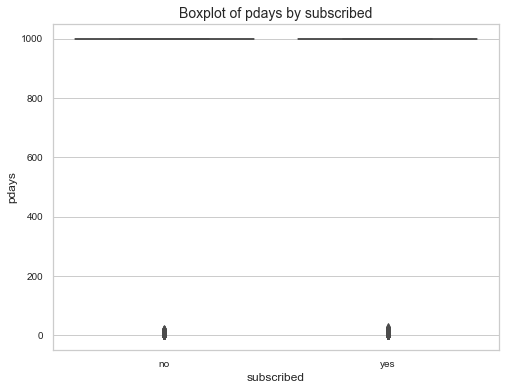

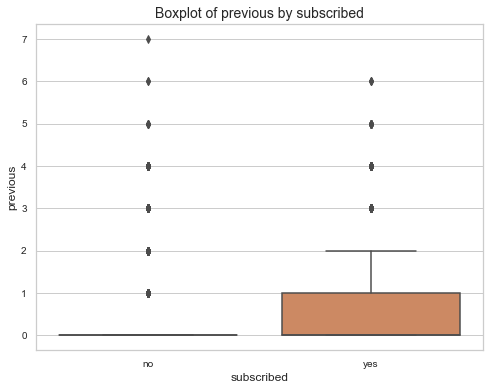

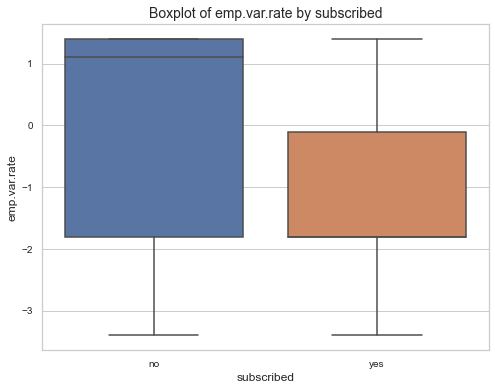

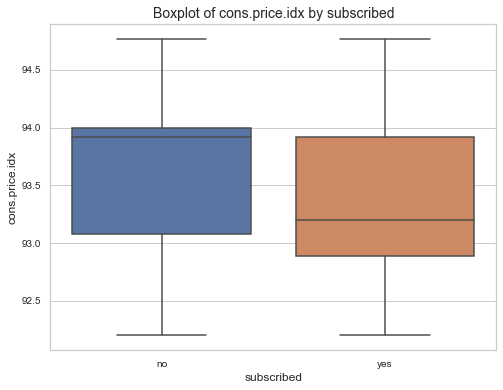

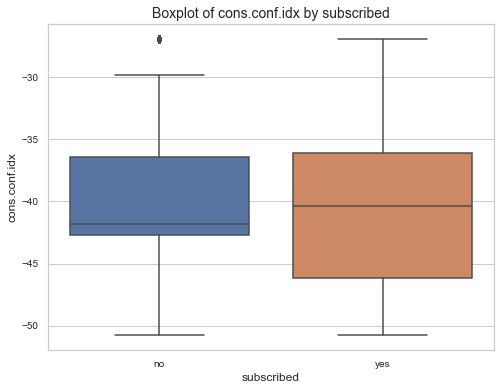

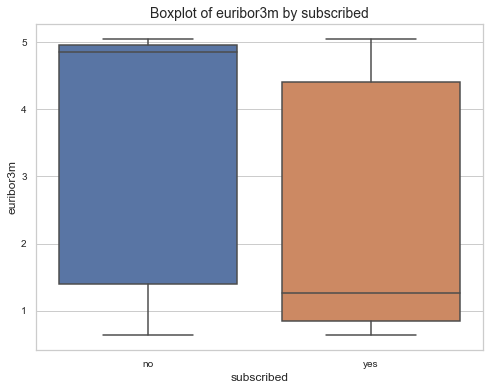

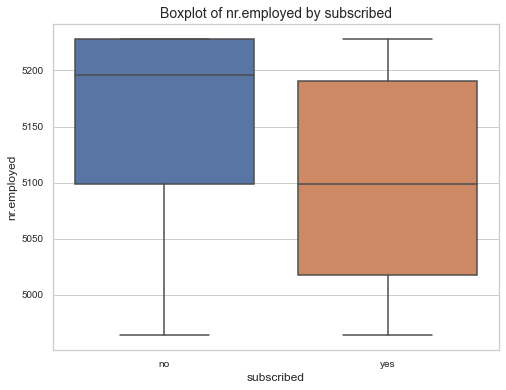

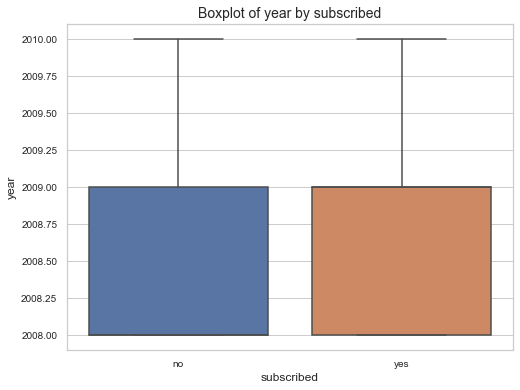

In [5]:
for column in numeric_df.columns:
    plot_boxplot(data, column, y='subscribed')

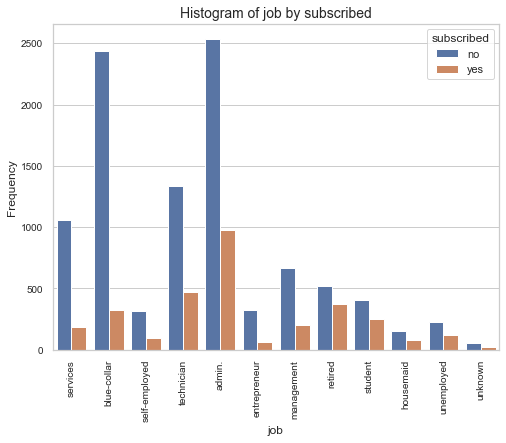

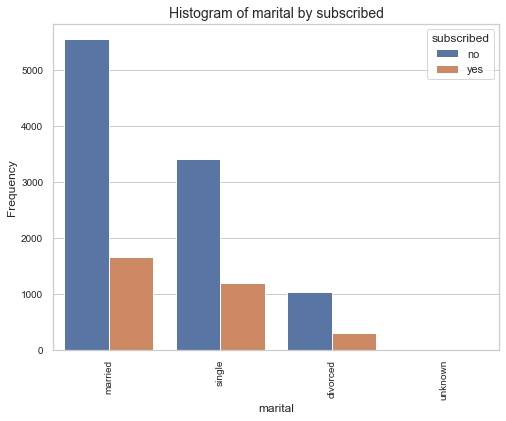

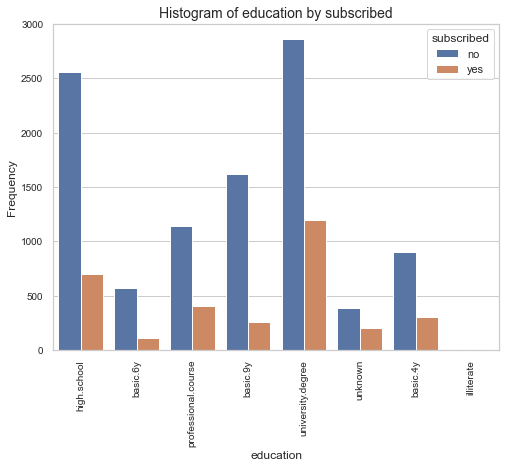

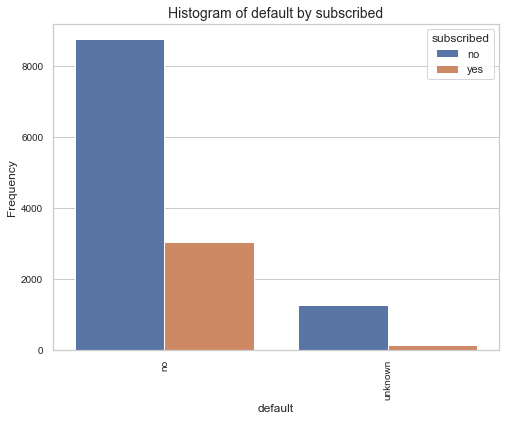

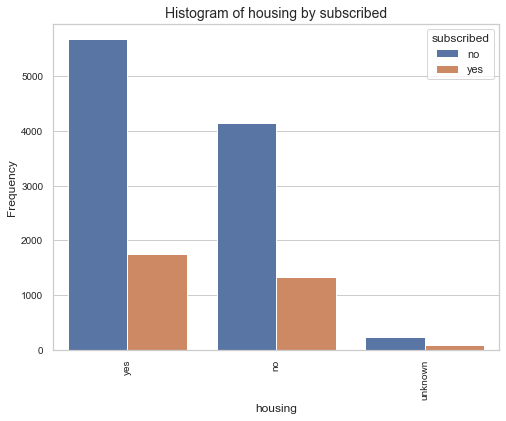

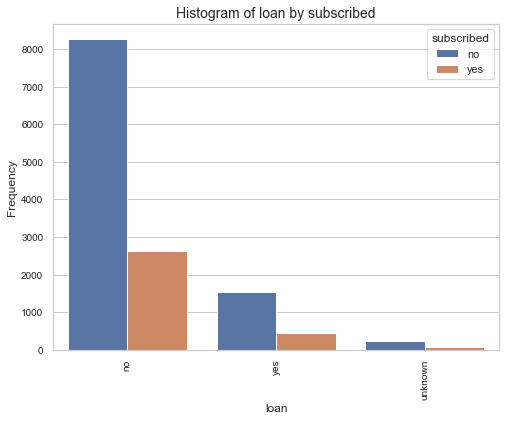

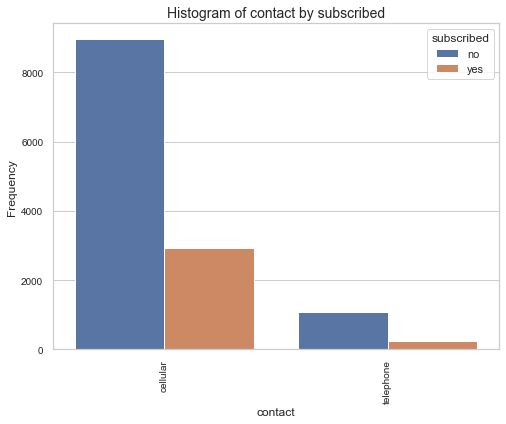

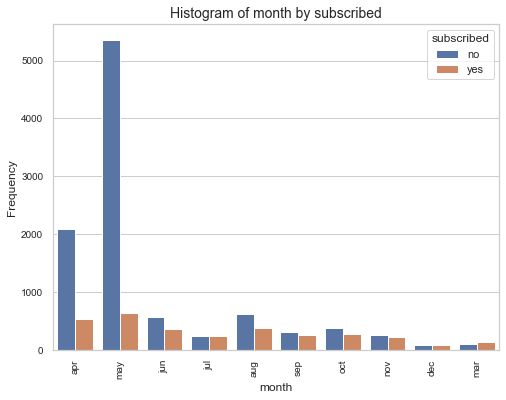

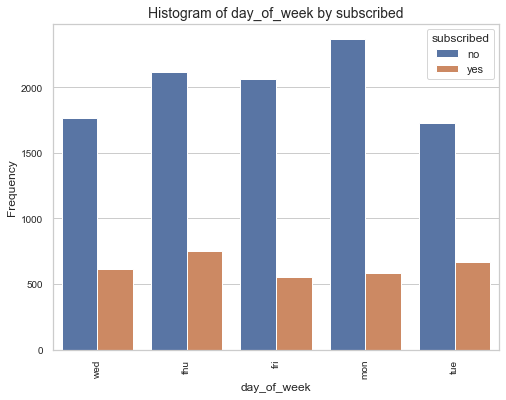

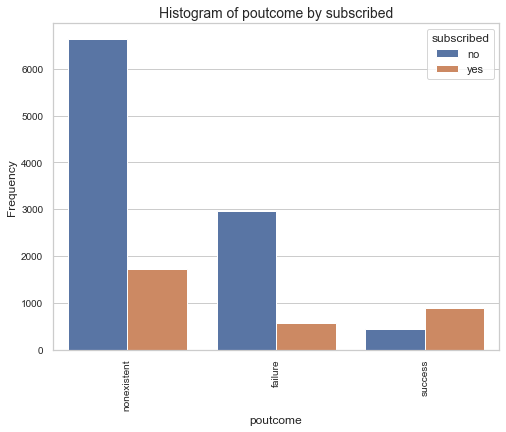

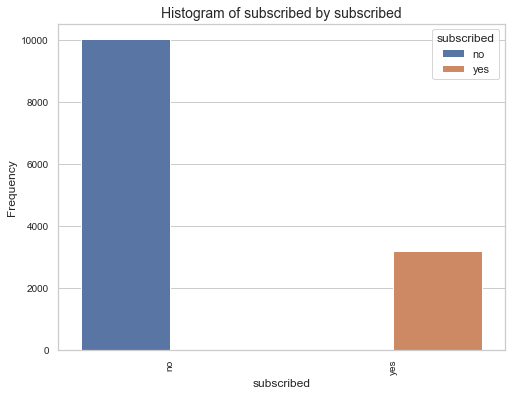

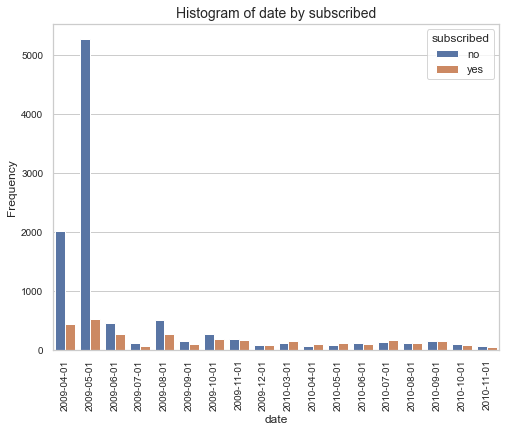

In [6]:
for column in categorical_df.columns:
    plot_histogram(data, column, y='subscribed')

In [7]:

data.groupby('campaign').count()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,subscribed,year,date
campaign,,,,,,,,,,,,,,,,,,,,,
1,17642,17642,17642,17642,17642,17642,17642,17642,17642,17642,...,17642,17642,17642,17642,17642,17642,17642,17642,17642,17642
2,10570,10570,10570,10570,10570,10570,10570,10570,10570,10570,...,10570,10570,10570,10570,10570,10570,10570,10570,10570,10570
3,5341,5341,5341,5341,5341,5341,5341,5341,5341,5341,...,5341,5341,5341,5341,5341,5341,5341,5341,5341,5341
4,7635,7635,7635,7635,7635,7635,7635,7635,7635,7635,...,7635,7635,7635,7635,7635,7635,7635,7635,7635,7635


<AxesSubplot:>

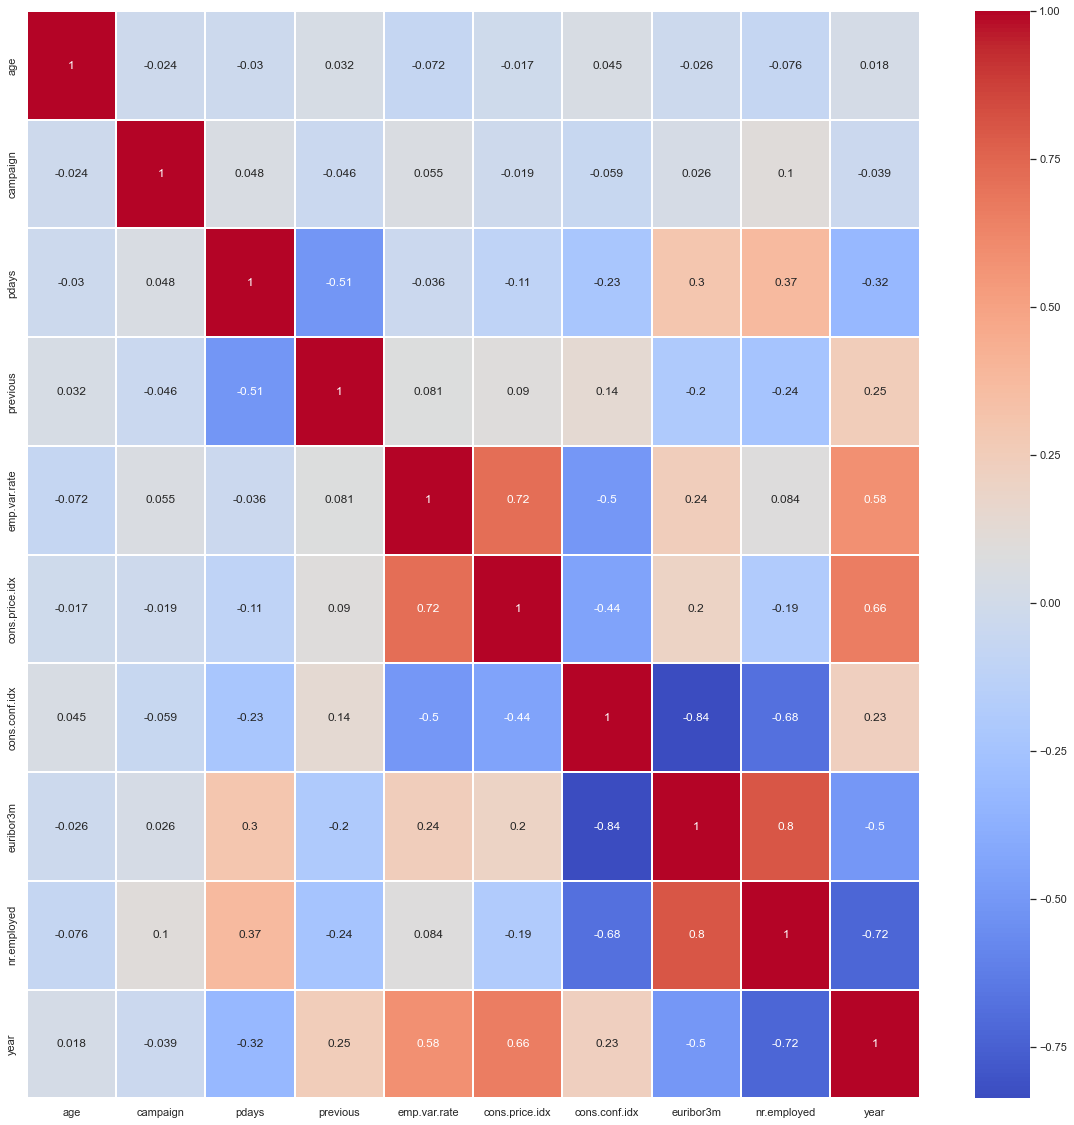

In [8]:
corr_matrix = data.corr(method='spearman')

fig, ax = plt.subplots(figsize=(20,20)) 
sns.heatmap(corr_matrix.astype(np.float64),annot=True,linewidths=.3,cmap='coolwarm',ax=ax)